In [ ]:
!cp -r drive/Shareddrives/Virtuon/Machine\ Learning\ Project/Pre_Trained_Model/* /content

In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
import cv2 as cv
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random

from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Sequential, Model

import matplotlib.pyplot as plt
%matplotlib inline

from tf_bodypix.api import download_model, load_model, BodyPixModelPaths

In [ ]:
!pip install tf-bodypix[all]

In [ ]:
file = '/content/drive/Shareddrives/Virtuon/download_1.jpg'
file1 = '/content/drive/Shareddrives/Virtuon/download_2.jpg'
file2 = '/content/drive/Shareddrives/Virtuon/download_3.jpg'
file3 = '/content/drive/MyDrive/WhatsApp Image 2021-01-02 at 3.35.47 PM.jpeg'
file4=  '/content/drive/Shareddrives/Virtuon/Front_Pose.jpg'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bodypix_model = load_model(download_model(BodyPixModelPaths.MOBILENET_FLOAT_50_STRIDE_16))

In [ ]:
image = tf.keras.preprocessing.image.load_img(file3)
image.show()

In [ ]:
# image converted to image array
image_array = tf.keras.preprocessing.image.img_to_array(image)
# bodypix prediction
result = bodypix_model.predict_single(image_array)

In [ ]:
mask = result.get_mask(threshold=0.75)
tf.keras.preprocessing.image.save_img('bodypix-mask.jpg',mask)

In [ ]:
colored_mask = result.get_colored_part_mask(mask)
tf.keras.preprocessing.image.save_img('bodypix-colored-mask.jpg',colored_mask)

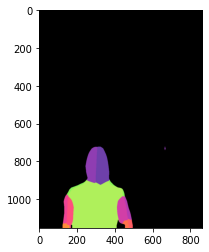

In [ ]:
plt.imshow(colored_mask)
plt.show()
plt.imsave('colored_mask.jpg', colored_mask.astype(np.uint8))

# New section

In [ ]:
!unzip /content/drive/Shareddrives/Virtuon/Machine\ Learning\ Project/LIP_Dataset/LIP_Dataset.zip -d /content